# Numerical Solutions

Often we can't find an analytical solution, therefore there are some classic approaches for finding numerical solutions. We will focus in just one for this lesson.

## Runge Kuta 

Single-step Runge–Kutta methods associate a function $\Phi(t, y, h)$ which requires (possibly repeated) function evaluations of $f(t, y)$ but not its derivatives.

In general, single-step Runge–Kutta methods have the form:

$$
y_0 = y(a) \\
y_{k+1} = y_k + h \Phi(t_k ,y_k, h)
$$
where
$$
\Phi(t_k ,y_k, h) = \sum_{r=1}^R c_r K_r, \\
K_1 = f(t, y), \\
K_r = f(t + a_r h, y + h \sum_{s=1}^{r-1}b_{rs} K_s), \\
a_r = \sum_{s=1}^{r-1}b_{rs}, \qquad r=2, 3, \ldots, R
$$

The most well-known Runge–Kutta scheme (from elementary numerical analysis texts) is 4-th order; it has the
form:

$$
y_0 = y(t_0) \\
y_{k+1} = y_k + \frac{h}{6} \left[ K_1 + 2 K_2 + 2 K_3 + K4 \right] \\
K_1 = f(t_k, y_k) \\
K_2 = f\left(t_k + \frac{h}{2}, y_k + \frac{h}{2} K_1 \right) \\
K_3 = f\left(t_k + \frac{h}{2}, y_k + \frac{h}{2} K_2 \right) \\
K_4 = f(t_k + h, y_k + h K_3)
$$
i.e.,
$$
\Phi(t_k, y_k, h) = \frac{h}{6} \left[ K_1 + 2 K_2 + 2 K_3 + K4 \right]
$$

### Implementation

Let's consider the following initial value problem

$$
y^\prime(t) = \frac{t}{9} \cos(2y) + t^2 \\
y(0) = 1

We need a package for scientific computing (`numpy`), plotting (`matplotlib`) and a tool for solving initial values problems with Runge-Kuta methods (`scipy.integrate.solve_ivp`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

First of all, you need to define a function which takes as arguments $t$ and $y$ and returns the right side of the equation. In this case,
$$
f(t, y) = \frac{t}{9} \cos(2y) + t^2
$$

In [2]:
def f(t, y):
    return t / 9 * np.cos(2 * y) + t ** 2

Now, we need to define the domain where we will solve the equation. Since our initial condition is in $t_0=0$ our domain must include it. And consider, just as an example, the final time as $t_n = 10$ and $h=0.5$ (later you can try smaller values!).

In [3]:
t0 = 0
tn = 10
h = 0.5
t_array = np.arange(t0, tn, h)
t_array

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

Note that `solve_ivp` function only needs $f(t, y)$, a timespan (`t_span`) and initial conditions (`y_0`), however, we can include the points where the solution we will be evaluate with `t_eval`.

In [4]:
sol = solve_ivp(f, t_span=[0, 10], y0=[1], t_eval=t_array)

Finally, you can get the solution points with `sol.y` but for ploting we need a flat array (just use `.flatten()` method).

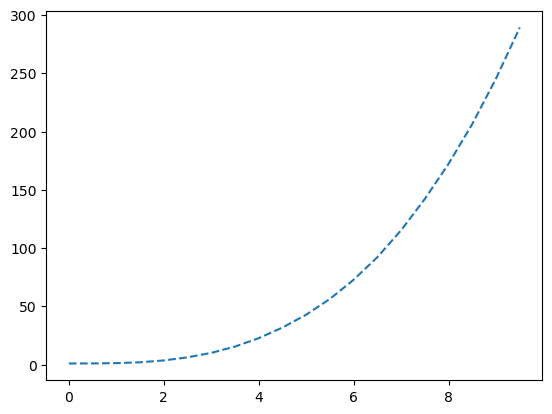

In [5]:
y_sol = sol.y.flatten()
plt.plot(t_array, y_sol, linestyle="dashed")